# 지금까지 잘 해왔고 끝까지 밀고 나가자!

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 읽어오기
path = 'https://bit.ly/AdmissionFile'
data = pd.read_csv(path)

# 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


## 모델링

In [3]:
# x, y 분리
target = 'ADMIT'
x =  data.drop(target, axis=1)
y = data[target] # == data.loc[:, target]

In [4]:
# 학습용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                   random_state=2022)

In [6]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 선언하기
model = DecisionTreeClassifier(max_depth=5)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[74  9]
 [12 55]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        83
           1       0.86      0.82      0.84        67

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



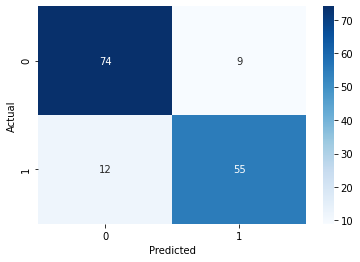

In [10]:
# 혼동행렬 시각화
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 튜닝

In [15]:
# 불러오기
from sklearn.model_selection import RandomizedSearchCV

# 매개변수 값 범위 선언
param = {'max_depth':range(1, 51)}

# 기본 모델 선언
model_dt = DecisionTreeClassifier()

# 튜닝
model = RandomizedSearchCV(model_dt,
                          param,
                          cv=10,
                          n_iter=20,
                          scoring='accuracy',
                          n_jobs=-1)
# 학습
model.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=-1, param_distributions={'max_depth': range(1, 51)},
                   scoring='accuracy')

In [17]:
# 확인
print(model.best_params_)
print(model.best_score_)

{'max_depth': 3}
0.8657142857142859


In [25]:
# 최적 파라미터로 학습된 최종 모델
model.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [18]:
# 예측하기
y_pred = model.predict(x_test)

In [19]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[80  3]
 [11 56]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        83
           1       0.95      0.84      0.89        67

    accuracy                           0.91       150
   macro avg       0.91      0.90      0.90       150
weighted avg       0.91      0.91      0.91       150



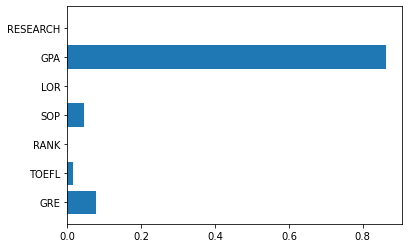

In [24]:
# feature 중요도 시각화
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()